## 1. Предобработка текстовых данных

In [24]:
!pip install gensim corus razdel pymorphy3 fasttext navec nltk bs4 requests

  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.2-cp311-cp311-macosx_10_9_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.2-cp311-cp311-macosx_10_9_universal2.whl (198 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [requests]4/5 [requests]


### 1.1 Получение данных

В начале может возникнуть вопрос, где взять данные? В интернете существует огромное количество готовых датасетов, кроме того, всегда можно собрать свой собственный, но еще существуют python-пакеты, облегчающие загрузку некоторых наборов данных.

#### Corus

Ссылки на общедоступные русскоязычные корпуса + код для загрузки и парсинга.

[Репозиторий проекта](https://github.com/natasha/corus)

[Natasha](https://natasha.github.io/) - набор Python-библиотек для обработки текстов на естественном русском языке

In [10]:
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

--2025-07-28 15:08:26--  https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/87156914/0b363e00-0126-11e9-9e3c-e8c235463bd6?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-28T13%3A00%3A28Z&rscd=attachment%3B+filename%3Dlenta-ru-news.csv.gz&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-28T11%3A59%3A38Z&ske=2025-07-28T13%3A00%3A28Z&sks=b&skv=2018-11-09&sig=kNGgIzAtUmMbl%2Bs6hJNwpoDhxdb11BftDl%2F9124emHI%3D&jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1MzcwNDgwNiwibmJmIjoxNzUzNzA0NTA2LCJwYXRoIjoicmVsZWFzZWFzc2

OSError: [Errno 5] Input/output error

In [12]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [13]:
dataset = [next(records).text for i in range(1000)]
dataset[0]

'Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС. «Действует презумпция невиновности. Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве. Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам. Все они продолжат выступление на Кубке мира. Полиция нагрянула в отель сборной России в Хохфильцене вечером 12 декабря. Как написал биатлонист Александр Логинов, их считают виновными в махинациях с переливанием крови. Биатлонисту Антону Шипулину, также попавшему в список, полиция нанесла отдельный визит: сейчас он тренируется отдельно в австрийском Обертиллахе. Обвинения спортсмен назвал бредом, а также указал на «охоту на ведьм» в мировом биатлоне. В Австрии прием допинга — уголовное пр

#### NLTK

[Natural Language Toolkit](https://www.nltk.org/) - библиотека, предоставляющая простые в использовании интерфейсы к более чем 50 корпусам и лексическим ресурсам, таким как WordNet, а также включающая в себя инструменты для классификации текстов, токенизации, синтаксического анализа и т.д.

[Corpus Readers](https://www.nltk.org/howto/corpus.html)

In [14]:
import nltk
nltk.download('gutenberg') # data
nltk.download('punkt') # punkt tokenizer
nltk.download('punkt_tab')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/sergey/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /Users/sergey/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sergey/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [16]:
macbeth = nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')
print(macbeth[0])
macbeth

[


['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', ...]

In [17]:
macbeth = nltk.corpus.gutenberg.sents('shakespeare-macbeth.txt')
print(macbeth[0])
macbeth

['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']']


[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

### 1.2 Очистка

#### BeautifulSoup - HTML&CSS теги

In [25]:
from bs4 import BeautifulSoup
import requests

In [26]:
html = requests.get('https://habr.com/ru/post/716386/').text
html[:1000]

'<!DOCTYPE html>\n<html lang="ru">\n\n  <head>\n    <title>DevOps и SRE просто модно &#x2F; Хабр</title>\n<meta property="fb:app_id" content="444736788986613">\n<meta property="fb:pages" content="472597926099084">\n<meta name="twitter:card" content="summary_large_image">\n<meta name="twitter:site" content="@habr_com">\n<meta property="og:site_name" content="Хабр">\n<link href="https://habr.com/ru/rss/post/716386/?fl=ru" type="application/rss+xml" title rel="alternate" name="rss">\n<link href="https://habr.com/ru/articles/716386/" rel="canonical" data-hid="e3fa780">\n<link rel="image_src" href="https://habrastorage.org/getpro/habr/upload_files/02d/f24/6da/02df246da19d0aa1108c5d4f7cac2247.png" data-hid="2a79c45">\n<link rel="amphtml" href="https://habr.com/ru/amp/publications/716386/">\n<meta property="og:title" content="DevOps и SRE просто модно">\n<meta name="twitter:title" content="DevOps и SRE просто модно">\n<meta name="aiturec:title" content="DevOps и SRE просто модно">\n<meta name

In [27]:
soup = BeautifulSoup(html, 'html.parser')
soup.get_text()

'\n\n\nDevOps и SRE просто модно / Хабр\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nМенюХабрβПоискНаписать публикациюНастройкиВойтиОбновитьencore-show 12  фев  2023 в 12:37DevOps и SRE просто модноУровень сложностиПростойВремя на прочтение3 минКоличество просмотров5KDevOps*МнениеВсем привет, Хабровчане!Хочу рассказать про современный мир IT и его подходах. Сегодня каждая компания говорит про DevOps и более чем уверенна, что он у них есть. Читая вакансии на множестве ресурсов, я часто вижу объявления "требуется DevOps инженер" с расписанным стеком тех или иных модных инструментов. Но вот что самое интересное, что больше ничего и не требуется, главное знать как пользоваться теми самими инструментами. То есть "DevOps инженер" - это такой оператор, который знает куда тыкать и где просто нужно описать пайпллайн, не вдаваясь в подробности разработки. Когда эта методология толь

In [28]:
for data in soup(['style', 'script']):
  data.decompose()
' '.join(soup.stripped_strings)

'DevOps и SRE просто модно / Хабр Меню Хабр β Поиск Написать публикацию Настройки Войти Обновить encore-show 12  фев  2023 в 12:37 DevOps и SRE просто модно Уровень сложности Простой Время на прочтение 3 мин Количество просмотров 5K DevOps * Мнение Всем привет, Хабровчане! Хочу рассказать про современный мир IT и его подходах. Сегодня каждая компания говорит про DevOps и более чем уверенна, что он у них есть. Читая вакансии на множестве ресурсов, я часто вижу объявления "требуется DevOps инженер" с расписанным стеком тех или иных модных инструментов. Но вот что самое интересное, что больше ничего и не требуется, главное знать как пользоваться теми самими инструментами. То есть "DevOps инженер" - это такой оператор, который знает куда тыкать и где просто нужно описать пайпллайн, не вдаваясь в подробности разработки. Когда эта методология только пришла к нам, порог вхождения был довольно высок, а сегодня пара курсов дают пропуск в этот мир и это грустно. Ну ладно, к чему я это все, в бол

#### Emails

In [29]:
import re

In [30]:
text_email = "Hi my email is mailtome@gmail.com feel free to write"

In [31]:
pattern = r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+'
re.sub(pattern, '<no emails!!!>', text_email)

'Hi my email is <no emails!!!> feel free to write'

```
(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=^_`{|}~-]+)*
|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]
|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")
@
(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?
|\[(?:(?:(2(5[0-5]|[0-4][0-9])
|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])
|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]
|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])
```

This is the RFC5322-compliant Regular Expression that covers 99.99% of input email addresses.* Explaining it with words is typically off the table, but visualizing it helps a lot:

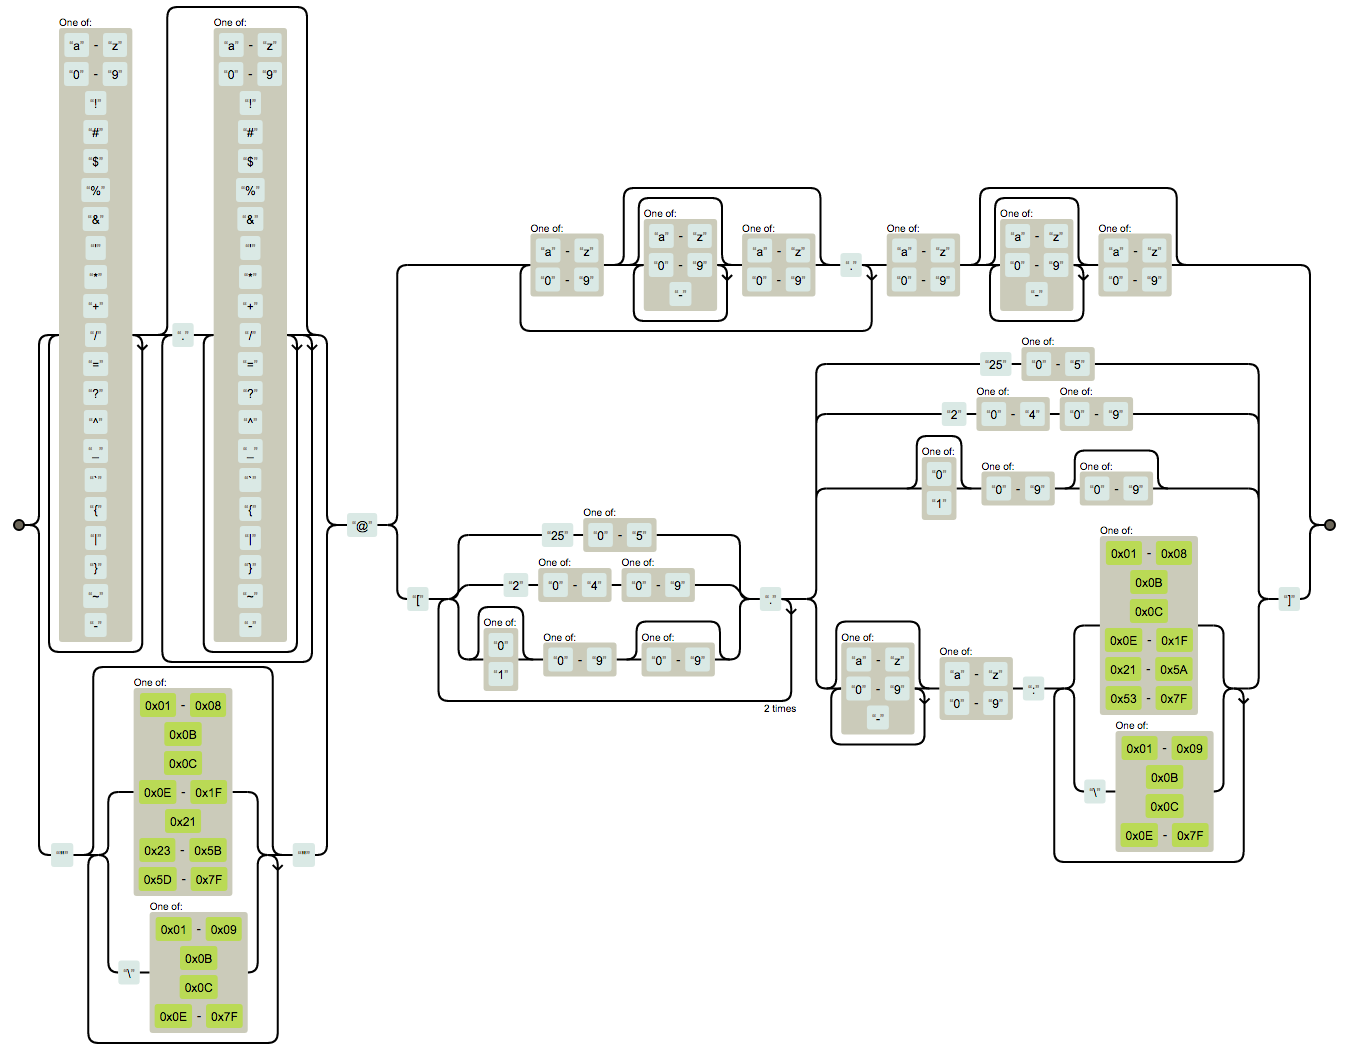

### 1.3 Токенизация

**Токенизация** – это процесс разбиения фразы, предложения, абзаца или всего текстового документа на более мелкие единицы.

Уровни абстракции текстов:

- буквы
- n-граммы
- BPE (Byte Pair Encoding)
- слова
- словосочетания (word n-gramms)
- предложения
- документы

In [32]:
text = dataset[0]
text

'Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС. «Действует презумпция невиновности. Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве. Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам. Все они продолжат выступление на Кубке мира. Полиция нагрянула в отель сборной России в Хохфильцене вечером 12 декабря. Как написал биатлонист Александр Логинов, их считают виновными в махинациях с переливанием крови. Биатлонисту Антону Шипулину, также попавшему в список, полиция нанесла отдельный визит: сейчас он тренируется отдельно в австрийском Обертиллахе. Обвинения спортсмен назвал бредом, а также указал на «охоту на ведьм» в мировом биатлоне. В Австрии прием допинга — уголовное пр

#### Простой python

Разделение по символам

In [33]:
', '.join(list(text)[:40])

'А, в, с, т, р, и, й, с, к, и, е,  , п, р, а, в, о, о, х, р, а, н, и, т, е, л, ь, н, ы, е,  , о, р, г, а, н, ы,  , н, е'

Простое разделение на слова по пробелам

In [34]:
', '.join(text.split()[:40])

'Австрийские, правоохранительные, органы, не, представили, доказательств, нарушения, российскими, биатлонистами, антидопинговых, правил., Об, этом, сообщил, посол, России, в, Вене, Дмитрий, Любинский, по, итогам, встречи, уполномоченного, адвоката, дипмиссии, с, представителями, прокуратуры, страны,, передает, ТАСС., «Действует, презумпция, невиновности., Каких-либо, ограничений, свободы, передвижения, для'

#### Регулярные выражения

Регулярные выражения (их еще называют regexp, или regex) — это механизм для поиска и замены текста

[Регулярные выражения (regexp) — основы](https://habr.com/ru/post/545150/)

In [35]:
re.findall(r'\w+', text)[:30]

['Австрийские',
 'правоохранительные',
 'органы',
 'не',
 'представили',
 'доказательств',
 'нарушения',
 'российскими',
 'биатлонистами',
 'антидопинговых',
 'правил',
 'Об',
 'этом',
 'сообщил',
 'посол',
 'России',
 'в',
 'Вене',
 'Дмитрий',
 'Любинский',
 'по',
 'итогам',
 'встречи',
 'уполномоченного',
 'адвоката',
 'дипмиссии',
 'с',
 'представителями',
 'прокуратуры',
 'страны']

#### NLTK

In [36]:
from nltk.tokenize import (
    sent_tokenize,
    word_tokenize,
    TweetTokenizer,
    WordPunctTokenizer,
    WhitespaceTokenizer,
    LegalitySyllableTokenizer,
    SyllableTokenizer,
)

##### word_tokenize & sentence_tokenize

word_tokenize = **TreebankWordTokenizer** + Punkt model


Внутри происходит также sent_tokenize

Treebank – это проанализированный текстовый корпус, который аннотирует синтаксическую или семантическую структуру предложения.

```
class TreebankWordTokenizer(TokenizerI):

  This tokenizer performs the following steps:

  split standard contractions, e.g. don't -> do n't and they'll -> they 'll

  treat most punctuation characters as separate tokens

  split off commas and single quotes, when followed by whitespace

  separate periods that appear at the end of line
```

Для работы нужна загруженная модель Punkt sentence tokenization

In [37]:
words = word_tokenize(text)
words[:20]

['Австрийские',
 'правоохранительные',
 'органы',
 'не',
 'представили',
 'доказательств',
 'нарушения',
 'российскими',
 'биатлонистами',
 'антидопинговых',
 'правил',
 '.',
 'Об',
 'этом',
 'сообщил',
 'посол',
 'России',
 'в',
 'Вене',
 'Дмитрий']

language имеет значение

In [38]:
russian_text = "Ай да А.С. Пушкин! Ай да сукин сын!"
print("Before:", nltk.sent_tokenize(russian_text))
print("After:", nltk.sent_tokenize(russian_text, language="russian"))

Before: ['Ай да А.С.', 'Пушкин!', 'Ай да сукин сын!']
After: ['Ай да А.С. Пушкин!', 'Ай да сукин сын!']


In [39]:
sentences = sent_tokenize(text, language='russian')
sentences[:5]

['Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил.',
 'Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС.',
 '«Действует презумпция невиновности.',
 'Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве.',
 'Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам.']

##### TweetTokenizer

Ни одно универсальное решение не работает хорошо, и мы должны решить, что считать токеном, в зависимости от домена приложения.

In [40]:
s = "Snow White and the Seven Degrees #MakeAMovieCold@midnight:)"
print(word_tokenize(s))

['Snow', 'White', 'and', 'the', 'Seven', 'Degrees', '#', 'MakeAMovieCold', '@', 'midnight', ':', ')']


In [41]:
print(TweetTokenizer().tokenize(s))

['Snow', 'White', 'and', 'the', 'Seven', 'Degrees', '#MakeAMovieCold', '@midnight', ':)']


##### LegalitySyllableTokenizer


Разбиение по слогам, нужен [словарь](http://opencorpora.org/dict.php) и набор гласных языка

In [42]:
!wget https://opencorpora.org/files/export/dict/dict.opcorpora.txt.zip
!unzip dict.opcorpora.txt.zip

--2025-07-28 15:11:41--  https://opencorpora.org/files/export/dict/dict.opcorpora.txt.zip
Resolving opencorpora.org (opencorpora.org)... 172.67.163.210, 104.21.15.199
Connecting to opencorpora.org (opencorpora.org)|172.67.163.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25041909 (24M) [application/zip]
Saving to: ‘dict.opcorpora.txt.zip’

dict.opcorpora.txt. 100%[===================>]  23.88M  1.48MB/s    in 15s     

2025-07-28 15:11:57 (1.57 MB/s) - ‘dict.opcorpora.txt.zip’ saved [25041909/25041909]

Archive:  dict.opcorpora.txt.zip
  inflating: dict.opcorpora.txt      


In [ ]:
with open('dict.opcorpora.txt', 'r', encoding='utf-8') as f:
    all_line = f.readlines()
corpora = [line.split('\t')[0].lower() for line in all_line if len(line.split('\t')) > 1]
corpora[:10]

['ёж', 'ежа', 'ежу', 'ежа', 'ежом', 'еже', 'ежи', 'ежей', 'ежам', 'ежей']

In [ ]:
text

'Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС. «Действует презумпция невиновности. Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве. Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам. Все они продолжат выступление на Кубке мира. Полиция нагрянула в отель сборной России в Хохфильцене вечером 12 декабря. Как написал биатлонист Александр Логинов, их считают виновными в махинациях с переливанием крови. Биатлонисту Антону Шипулину, также попавшему в список, полиция нанесла отдельный визит: сейчас он тренируется отдельно в австрийском Обертиллахе. Обвинения спортсмен назвал бредом, а также указал на «охоту на ведьм» в мировом биатлоне. В Австрии прием допинга — уголовное пр

In [ ]:
tokenizer = LegalitySyllableTokenizer(corpora, vowels='аеёиоуыэюя')
[tokenizer.tokenize(word) for word in word_tokenize(text)][:10]

[['Ав', 'стрийск', 'ие'],
 ['пра', 'во', 'о', 'хра', 'ни', 'тельн', 'ые'],
 ['ор', 'га', 'ны'],
 ['не'],
 ['пред', 'ста', 'ви', 'ли'],
 ['до', 'ка', 'за', 'тельств'],
 ['на', 'ру', 'шен', 'ия'],
 ['рос', 'сий', 'ски', 'ми'],
 ['би', 'ат', 'ло', 'ни', 'ста', 'ми'],
 ['ан', 'ти', 'до', 'пин', 'го', 'вых']]

##### SyllableTokenizer

Sonority Sequencing Principle - Принцип секвенирования звучания - это фонотаксический принцип, цель которого - очертить структуру слог с точки зрения звучности .

SSP утверждает, что ядро ​​слога (центр слога), часто гласный, составляет пик звучности, который предшествует и / или следует последовательность сегментов - согласных - с постепенно уменьшающимися значениями звучности (т. е. звучность должна падать к обоим краям слога).


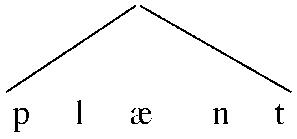

[О критерии слогоделения в современном русском языке](https://www.philol.msu.ru/~ruslang/data/pdf/vya1999-1.pdf)

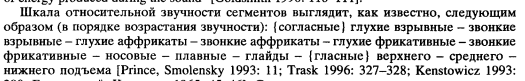

In [ ]:
tokenizer = SyllableTokenizer(
    lang='ru',
    sonority_hierarchy=[
        'аеёиоуыэюя', # гласные
        'мн', # носовые
        'вфзсжшх', # фрикативные
        'рпбдткгщ', # стоповые
    ] # https://www.philol.msu.ru/~fonetica/kons/n-12.htm
)
print(tokenizer.tokenize('антидопинговых'))

['ан', 'ти', 'до', 'пин', 'го', 'вых']


#### Spacy

[SpaCy](https://spacy.io/) — это библиотека с открытым исходным кодом для расширенной обработки естественного языка в Python.


[Fact & Figures](https://spacy.io/usage/facts-figures)

- Support for 72+ languages
- 80 trained pipelines for 24 languages
- Multi-task learning with pretrained transformers like BERT
- Pretrained word vectors
- State-of-the-art speed
- Production-ready training system
- Linguistically-motivated tokenization
- Components for named entity recognition, part-of-speech tagging, dependency parsing, sentence segmentation, text classification, lemmatization, morphological analysis, entity linking and more
- Easily extensible with custom components and attributes
- Support for custom models in PyTorch, TensorFlow and other frameworks
- Built in visualizers for syntax and NER
- Easy model packaging, deployment and workflow management
- Robust, rigorously evaluated accuracy

In [ ]:
import spacy
from spacy import displacy

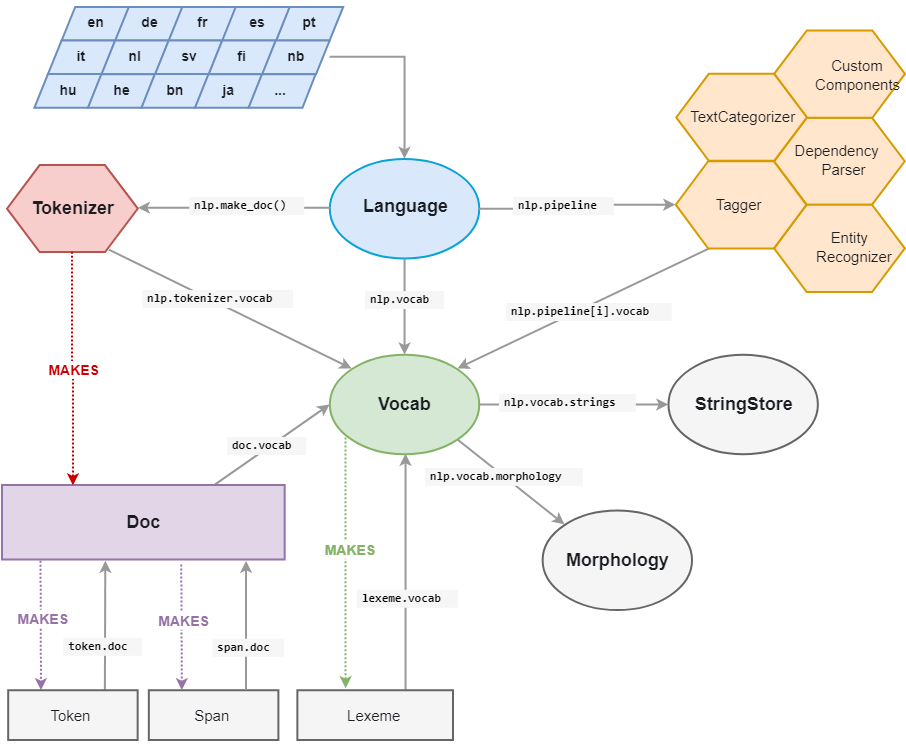

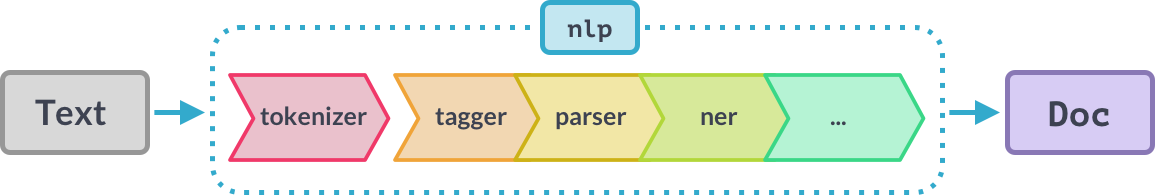

In [ ]:
!python3 -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 97.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("ru_core_news_sm")
nlp.pipe_names

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
sentences[0]

'Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил.'

In [ ]:
doc = nlp(sentences[0])
for token in doc:
    print(token.text)

Австрийские
правоохранительные
органы
не
представили
доказательств
нарушения
российскими
биатлонистами
антидопинговых
правил
.


#### Razdel

[Razdel](https://natasha.github.io/razdel/) — сегментация русскоязычного текста на токены и предложения

Сложности в русском языке:
- сокращения
- инициалы
- списки
- смайлики в конце предложения
- цитаты

Пайплайн работы:

`поиск кандидатов на конец предложения` -> `отсеивание лишних эвристиками` -> `все, что осталось, - токены`

Ограничения:

- Правила в Razdel оптимизированы для аккуратно написанных текстов с правильной пунктуацией. Решение хорошо работает с новостными статьями, художественными текстами. На постах из социальных сетей, расшифровках телефонных разговоров качество ниже.

- Если между предложениями нет пробела или в конце нет точки или предложение начинается с маленькой буквы, Razdel сделает ошибку.

[Замеры качества работы](https://github.com/natasha/razdel#tokens)

In [ ]:
from razdel import tokenize, sentenize

In [ ]:
russian_text = "Ай да А.С. Пушкин! Ай да сукин сын!"
[_.text for _ in list(sentenize(russian_text))]

['Ай да А.С. Пушкин!', 'Ай да сукин сын!']

In [ ]:
[_.text for _ in list(tokenize(sentences[0]))]

['Австрийские',
 'правоохранительные',
 'органы',
 'не',
 'представили',
 'доказательств',
 'нарушения',
 'российскими',
 'биатлонистами',
 'антидопинговых',
 'правил',
 '.']

### 1.4 Морфологический анализ

Морфология - раздел грамматики, изучающий формы слов

[pymorphy2 документация](https://pymorphy2.readthedocs.io/en/stable/user/index.html)

In [ ]:
import pymorphy3

In [ ]:
morph = pymorphy3.MorphAnalyzer()

**OpencorporaTag** - это набор граммем, характеризующих данное слово.

**Граммема** - значение какой-либо грамматической характеристики слова. Например, “множественное число” или “деепричастие”. Множество всех граммем, характеризующих данное слово, образует тег.

Например, тег 'VERB,perf,intr plur,past,indc' означает, что слово - глагол (VERB) совершенного вида (perf), непереходный (intr), множественного числа (plur), прошедшего времени (past), изъявительного наклонения (indc).

In [ ]:
morph.parse('стали')

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.975342, methods_stack=((DictionaryAnalyzer(), 'стали', 945, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.010958, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.005479, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 9),))]

In [ ]:
morph.parse('дом')

[Parse(word='дом', tag=OpencorporaTag('NOUN,inan,masc sing,nomn'), normal_form='дом', score=0.570175, methods_stack=((DictionaryAnalyzer(), 'дом', 1375, 0),)),
 Parse(word='дом', tag=OpencorporaTag('NOUN,inan,masc sing,accs'), normal_form='дом', score=0.429824, methods_stack=((DictionaryAnalyzer(), 'дом', 1375, 4),))]

In [ ]:
morph.parse('.')

[Parse(word='.', tag=OpencorporaTag('PNCT'), normal_form='.', score=1.0, methods_stack=((PunctuationAnalyzer(score=0.9), '.'),))]

«Гло́кая ку́здра ште́ко будлану́ла бо́кра и курдя́чит бокрёнка» — искусственная фраза на основе русского языка, в которой все корневые морфемы заменены на бессмысленные сочетания звуков.

In [ ]:
morph.parse('куздра')

[Parse(word='куздра', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,nomn'), normal_form='куздра', score=0.15000000000000002, methods_stack=((DictionaryAnalyzer(), 'дра', 268, 0), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'куз'))),
 Parse(word='куздра', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,gent'), normal_form='куздра', score=0.15000000000000002, methods_stack=((DictionaryAnalyzer(), 'дра', 268, 1), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'куз'))),
 Parse(word='куздра', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,datv'), normal_form='куздра', score=0.15000000000000002, methods_stack=((DictionaryAnalyzer(), 'дра', 268, 2), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'куз'))),
 Parse(word='куздра', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,accs'), normal_form='куздра', score=0.15000000000000002, methods_stack=((DictionaryAnalyzer(), 'дра', 268, 3), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'куз'))),
 Par

In [ ]:
morph.parse('курдячит')

[Parse(word='курдячит', tag=OpencorporaTag('VERB,impf,intr sing,3per,pres,indc'), normal_form='курдячать', score=0.5384615384615384, methods_stack=((DictionaryAnalyzer(), 'ячит', 564, 5), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'курд'))),
 Parse(word='курдячит', tag=OpencorporaTag('VERB,impf,intr sing,3per,pres,indc'), normal_form='курдячить', score=0.23076923076923075, methods_stack=((FakeDictionary(), 'курдячит', 371, 5), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'ячит'))),
 Parse(word='курдячит', tag=OpencorporaTag('VERB,perf,intr sing,3per,futr,indc'), normal_form='курдячить', score=0.23076923076923075, methods_stack=((FakeDictionary(), 'курдячит', 1551, 9), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'ячит')))]

[Обозначения для граммем](https://pymorphy2.readthedocs.io/en/stable/user/grammemes.html)

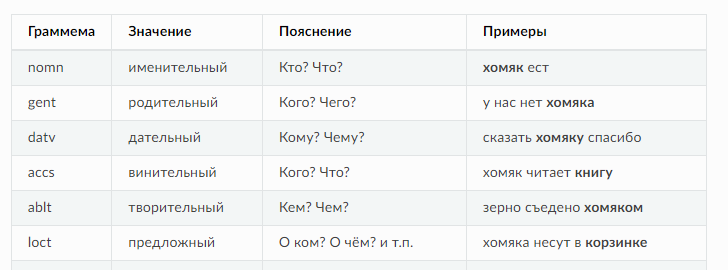

In [ ]:
init = morph.parse('собака')[0]
init.inflect({'datv'})

Parse(word='собаке', tag=OpencorporaTag('NOUN,anim,femn sing,datv'), normal_form='собака', score=1.0, methods_stack=((DictionaryAnalyzer(), 'собаке', 421, 2),))

#### Стемминг

##### NLTK

In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

**PorterStemmer** (Стеммер Портера) не использует баз основ слов, а лишь, применяя последовательно ряд правил, отсекает окончания и суффиксы, основываясь на особенностях языка, в связи с чем работает быстро, но не всегда безошибочно.

Всего применяется более 50 правил

```
SSES -> SS (caresses -> caress)
S ->  (cats -> cat)
...
```

In [ ]:
porter = PorterStemmer()
[(word, porter.stem(word)) for word in macbeth[56]][:15]

[('Norway', 'norway'),
 ('himselfe', 'himself'),
 (',', ','),
 ('with', 'with'),
 ('terrible', 'terribl'),
 ('numbers', 'number'),
 (',', ','),
 ('Assisted', 'assist'),
 ('by', 'by'),
 ('that', 'that'),
 ('most', 'most'),
 ('disloyall', 'disloyal'),
 ('Traytor', 'traytor'),
 (',', ','),
 ('The', 'the')]

**LancasterStemmer** - Более агрессивный стеммер, использует около 100 правил, и многократно запускает стемминг на одном и том же слове

```
“sei3y>” – if the word ends with “ies”, then replace the last three letters with “y” and then apply the stemmer again to truncated form.
```

In [ ]:
lancaster = LancasterStemmer()
[(word, lancaster.stem(word)) for word in macbeth[56]][:15]

[('Norway', 'norway'),
 ('himselfe', 'himself'),
 (',', ','),
 ('with', 'with'),
 ('terrible', 'terr'),
 ('numbers', 'numb'),
 (',', ','),
 ('Assisted', 'assist'),
 ('by', 'by'),
 ('that', 'that'),
 ('most', 'most'),
 ('disloyall', 'disloyal'),
 ('Traytor', 'trayt'),
 (',', ','),
 ('The', 'the')]

**Snowball Stemmer** - улучшенный вариант Стеммера Портера

```
ILY  -----> ILI
LY   -----> Nil
SS   -----> SS
S    -----> Nil
ED   -----> E,Nil
```

In [ ]:
snowball = SnowballStemmer(language='english')
[(word, snowball.stem(word)) for word in ['easily', 'cats', 'cared']]

[('easily', 'easili'), ('cats', 'cat'), ('cared', 'care')]

#### Лемматизация

##### pymorphy2

In [ ]:
morph.parse('собаками')[0].normal_form

'собака'

##### NLTK

In [ ]:
from nltk.stem import WordNetLemmatizer

Wordnet — это большая, свободно распространяемая и общедоступная лексическая база данных для английского языка с целью установления структурированных семантических отношений между словами

In [ ]:
nltk.download('wordnet')
wnl = WordNetLemmatizer()
[(word, wnl.lemmatize(word)) for word in word_tokenize(sentences[0])]

[nltk_data] Downloading package wordnet to /root/nltk_data...


[('Австрийские', 'Австрийские'),
 ('правоохранительные', 'правоохранительные'),
 ('органы', 'органы'),
 ('не', 'не'),
 ('представили', 'представили'),
 ('доказательств', 'доказательств'),
 ('нарушения', 'нарушения'),
 ('российскими', 'российскими'),
 ('биатлонистами', 'биатлонистами'),
 ('антидопинговых', 'антидопинговых'),
 ('правил', 'правил'),
 ('.', '.')]

In [ ]:
[(word, wnl.lemmatize(word)) for word in macbeth[56]][:15]

[('Norway', 'Norway'),
 ('himselfe', 'himselfe'),
 (',', ','),
 ('with', 'with'),
 ('terrible', 'terrible'),
 ('numbers', 'number'),
 (',', ','),
 ('Assisted', 'Assisted'),
 ('by', 'by'),
 ('that', 'that'),
 ('most', 'most'),
 ('disloyall', 'disloyall'),
 ('Traytor', 'Traytor'),
 (',', ','),
 ('The', 'The')]

## 2. Статистическая векторизация

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import spacy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
pd.set_option('max_colwidth', 400)

### 2.1 Набор данных
[
SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being **ham** (legitimate) or **spam**.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [ ]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='iso-8859-1')[['v1', 'v2']].rename(
    columns={'v1': 'label', 'v2': 'text'}
)
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
data['label'].value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

### 2.2 Очистка

Стоп-слова для английского языка в spaCy

In [ ]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
print(f'Spacy english stopwords size: {len(stopwords)}', end='\n\n')
' '.join(stopwords)

Spacy english stopwords size: 326



"without beside six others after except that n't various above latter itself ‘m see up five hundred none there alone enough but nevertheless ten much hereby not who 'll whence something could anyhow whereupon at used what thru however has still everything anyone 's ‘ll amongst out whither himself therein she from than next many no twelve moreover the among becomes your whoever their her otherwise ‘ve 're into twenty you nobody front thereby last anyway each although hence it everywhere keep an latterly least sixty i re either elsewhere show while through most might can over am side noone beyond whenever forty seem thence other are two anything bottom all did why already behind on across yet name or sometime beforehand seeming another his be somewhere to will would else nor we nowhere meanwhile ever whereby almost therefore fifty give eight as was move these top nine made call three must once onto during only herself doing never a had someone please every n‘t together afterwards part n’

Атрибуты [Token](https://spacy.io/api/token#attributes)

In [ ]:
%%time

data['cleaned_text'] = data['text'].apply(
    lambda x: ' '.join(
        token.lemma_.lower() for token in nlp(x) if
        not token.is_stop
        and not token.is_punct
        and not token.is_digit
        and not token.like_email
        and not token.like_num
        and not token.is_space
    )
)
data.sample(5)

CPU times: user 58.9 s, sys: 174 ms, total: 59.1 s
Wall time: 1min 10s


,label,text,cleaned_text
666,0,Carlos'll be here in a minute if you still need to buy,carlos'll minute need buy
2569,0,Ultimately tor motive tui achieve korli.,ultimately tor motive tui achieve korli
2613,0,Thanks for sending this mental ability question..,thank send mental ability question
1634,1,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 eg TONE DRACULA to 8007 Titles: GHOST, ADDAMSFA, MUNSTERS, EXORCIST, TWILIGHT www.getzed.co.uk POBox36504W45WQ 150p",eerie nokia tone 4u rply tone title eg tone dracula titles ghost addamsfa munsters exorcist twilight www.getzed.co.uk pobox36504w45wq 150p
3034,0,Raji..pls do me a favour. Pls convey my Birthday wishes to Nimya. Pls. Today is her birthday.,raji pls favour pls convey birthday wish nimya pls today birthday


In [ ]:
data['cleaned_text'].iloc[3]

'u dun early hor u c'

### 2.3 Bag of words

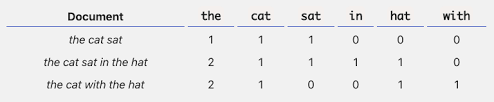

#### CountVectorizer

- приводит к нижнему регистру
- проводит токенизацию - `r"(?u)\b\w\w+\b"` (токены из 2 или более буквенно-цифровых символов, пунктуация полностью игнорируется и всегда рассматривается как разделитель токенов)
  - `(?u)` - флаг Unicode
  - `\b` - граница слова
  - `\w` - символы, которые могут входить в состав слов, включая числа и подчёркивание
  - `\+` - 1 и более повторений предшествующего выражения
- фильтрует стоп-слова

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

##### Стоп-слова

In [ ]:
print(f'Sklearn english stopwords size: {len(ENGLISH_STOP_WORDS)}', end='\n\n')
' '.join(ENGLISH_STOP_WORDS)

Sklearn english stopwords size: 318



'without beside six others after except that above latter itself see up five hundred none there cry alone enough but nevertheless ten much hereby not eg detail who whence something could anyhow whereupon at what thru however has still everything anyone inc amongst out whither himself therein she from than next many no ie twelve moreover the among becomes your whoever their her otherwise into twenty you nobody front thereby last fire anyway each mill con although hence it everywhere keep an latterly least sixty i re either elsewhere show while through thin most might can over am side noone beyond whenever forty seem thence other are two anything bottom all why already behind on across yet name or sometime beforehand seeming another his be co system somewhere to will would else couldnt nor we nowhere meanwhile ever whereby amoungst almost therefore fifty give eight as was move these top nine made call three must cant once onto during only herself never a had found someone please interest

This list of English stop words is taken from the "Glasgow Information Retrieval Group". The original list can be found at
http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words

[Stop Word Lists in Free Open-source Software Packages](https://aclanthology.org/W18-2502.pdf)

##### Train/test split & fit

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], random_state=2023)

In [ ]:
vectorizer = CountVectorizer(max_df=0.7, min_df=0.003) # max_df фильтрует corpus-specific stop words
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

##### Бейзлайн

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Константное предсказание

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_train_vectorized, y_train)
preds = dummy_clf.predict(X_test_vectorized)
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1207
           1       0.00      0.00      0.00       186

    accuracy                           0.87      1393
   macro avg       0.43      0.50      0.46      1393
weighted avg       0.75      0.87      0.80      1393



Логистическая регрессия

In [ ]:
logreg = LogisticRegression().fit(X_train_vectorized, y_train)
preds = logreg.predict(X_test_vectorized)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1207
           1       0.97      0.82      0.89       186

    accuracy                           0.97      1393
   macro avg       0.97      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



##### Переопределение токенизатора, препроцессинга

In [ ]:
def custom_tokenize(text):
  text = re.sub(r'[^a-zA-Z ]', '', text)
  return text.split()

In [ ]:
custom_vectorizer = CountVectorizer(
    max_df=0.7,
    min_df=0.003,
    tokenizer=custom_tokenize, # аналогично можно переопределить preprocessor
)
X_train_vectorized = custom_vectorizer.fit_transform(X_train)
X_test_vectorized = custom_vectorizer.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_vectorized

<4179x447 sparse matrix of type '<class 'numpy.int64'>'
	with 18737 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X_train_vectorized.toarray(), columns=custom_vectorizer.get_feature_names_out()).head()

,able,abt,account,actually,add,address,aft,afternoon,age,ah,...,xxx,y,ya,yeah,year,yes,yesterday,yo,yr,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
logreg = LogisticRegression().fit(X_train_vectorized, y_train)
preds = logreg.predict(X_test_vectorized)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1207
           1       0.99      0.83      0.90       186

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



### 2.4 Tf-Idf

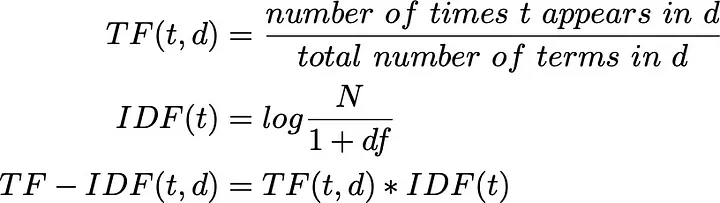

#### Отличия в реализации Sklearn

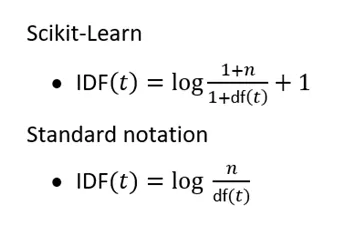

Также в Scikit-Learn результирующие векторы TF-IDF нормализуются по евклидовой норме, что облегчает расчет cosine similarity:
`The cosine similarity between two vectors is their dot product when l2 norm has been applied`

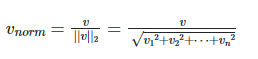

#### TfidfTransformer vs  TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer,  TfidfVectorizer
from sklearn.pipeline import Pipeline

**TfidfTransformer** преобразует матрицу из CountVectorizer в tf-idf

In [ ]:
pipe = Pipeline(
    steps=[
        ('counter', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ]
).fit(X_train, y_train)
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1207
           1       0.99      0.71      0.83       186

    accuracy                           0.96      1393
   macro avg       0.97      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393



**TfidfVectorizer** работает end-to-end

In [ ]:
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression())
    ]
).fit(X_train, y_train)
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1207
           1       0.99      0.71      0.83       186

    accuracy                           0.96      1393
   macro avg       0.97      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393



#### Оптимизация гиперпараметров пайплайна целиком - HalvingGridSearchCV

In [ ]:
pipe = Pipeline(
    steps=[
        ('counter', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ]
)

In [ ]:
parameter_grid = {
    "counter__max_df": np.linspace(0.3, 0.7, 10),
    "counter__min_df": [0.0, 0.001, 0.003, 0.005],
    "counter__ngram_range": ((1, 1), (1, 2)),  # слова или биграммы
    "tfidf__norm": ("l1", "l2"),
    "clf__C": np.linspace(0.1, 1, 10),
}

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
%%time

grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    cv=2,
    scoring='accuracy',
    random_state=42,
)
grid_search.fit(X_train, y_train)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 8
max_resources_: 4179
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1600
n_resources: 8
Fitting 2 folds for each of 1600 candidates, totalling 3200 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1760 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_para

----------
iter: 1
n_candidates: 534
n_resources: 24
Fitting 2 folds for each of 534 candidates, totalling 1068 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.78787879 0.78787879 0.78787879]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.78787879 0.78787879 0.78787879]
  warnings.warn(


----------
iter: 2
n_candidates: 178
n_resources: 72
Fitting 2 folds for each of 178 candidates, totalling 356 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.84563492 0.84563492 0.84563492]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.84563492 0.84563492 0.84563492]
  warnings.warn(


----------
iter: 3
n_candidates: 60
n_resources: 216
Fitting 2 folds for each of 60 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.84185704 0.84185704 0.84185704]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.84185704 0.84185704 0.84185704]
  warnings.warn(


----------
iter: 4
n_candidates: 20
n_resources: 648
Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.85628559 0.85628559 0.86556874]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.85628559 0.85628559 0.88099129]
  warnings.warn(


----------
iter: 5
n_candidates: 7
n_resources: 1944
Fitting 2 folds for each of 7 candidates, totalling 14 fits
CPU times: user 5.61 s, sys: 211 ms, total: 5.82 s
Wall time: 43.3 s


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.86310303 0.86310303 0.93000831]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.86310303 0.86310303 0.94955934]
  warnings.warn(


HalvingGridSearchCV(cv=2,
                    estimator=Pipeline(steps=[('counter', CountVectorizer()),
                                              ('tfidf', TfidfTransformer()),
                                              ('clf', LogisticRegression())]),
                    n_jobs=-1,
                    param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                'counter__max_df': array([0.3       , 0.34444444, 0.38888889, 0.43333333, 0.47777778,
       0.52222222, 0.56666667, 0.61111111, 0.65555556, 0.7       ]),
                                'counter__min_df': [0.0, 0.001, 0.003, 0.005],
                                'counter__ngram_range': ((1, 1), (1, 2)),
                                'tfidf__norm': ('l1', 'l2')},
                    random_state=42, scoring='accuracy', verbose=1)

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)

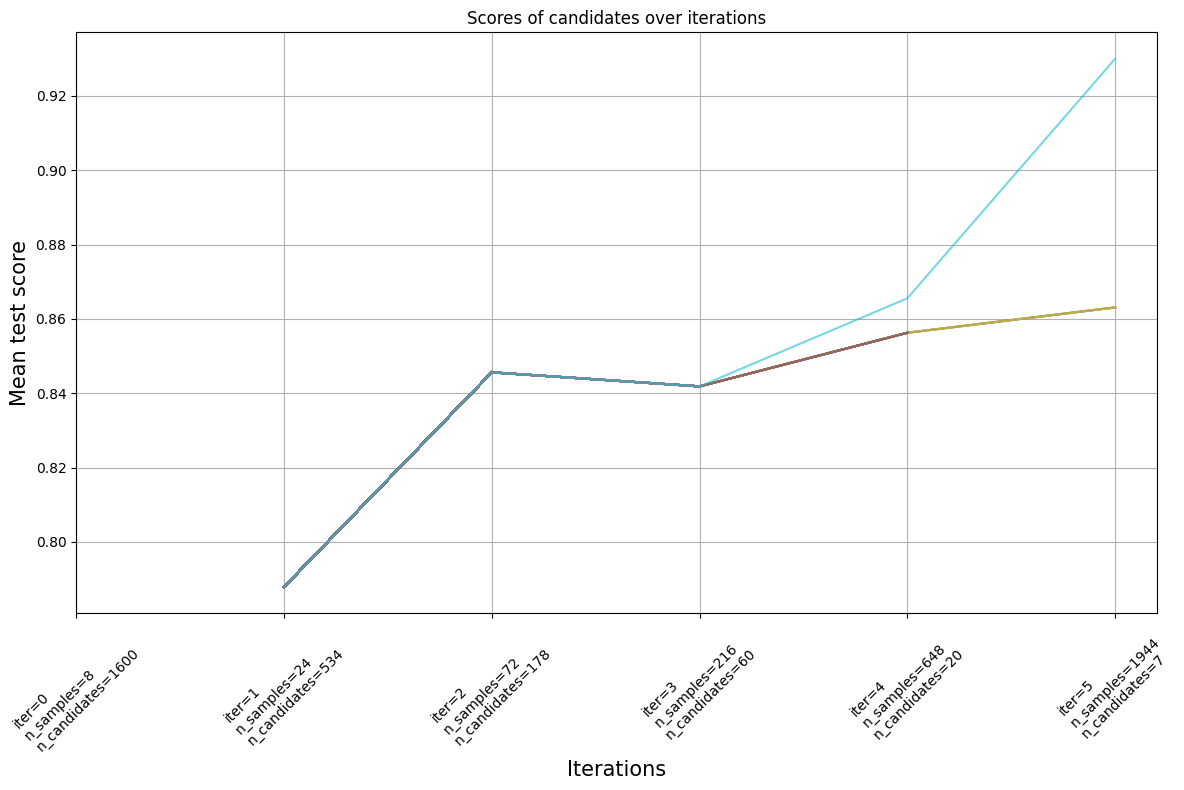

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter",
    columns="params_str",
     values="mean_test_score",
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={grid_search.n_resources_[i]}\nn_candidates={grid_search.n_candidates_[i]}"
    for i in range(grid_search.n_iterations_)
]

ax.set_xticks(range(grid_search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("Mean test score", fontsize=15)
ax.set_xlabel("Iterations", fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
grid_search.best_score_

0.9300083067390539

In [ ]:
preds = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1207
           1       0.99      0.77      0.86       186

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



## 3. Word2Vec

### 3.1 Skip-Gram & CBOW

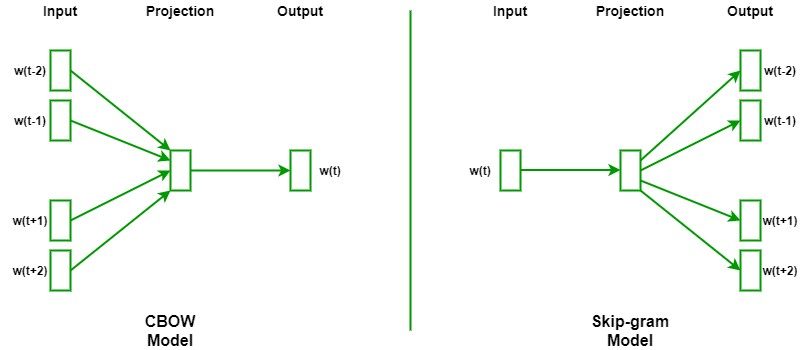

#### Skip-Gram PyTorch-реализация

```python
def prepare_data(text, window_size=2):
	text = re.sub(r'[^a-z@# ]', '', text.lower())    
	tokens = text.split()    
	vocab = set(tokens)
	word_to_ix = {word: i for i, word in enumerate(vocab)}

	data = []
	for i in range(len(tokens)):
		for j in range(max(0, i - window_size), min(len(tokens), i + window_size + 1)):
			if i != j:
				data.append((tokens[i], tokens[j]))    
	return data, word_to_ix, len(vocab)
```

```python
class SkipGramModelDataset(Dataset):
	def __init__(self, data, word_to_ix):
		self.data = [
          (word_to_ix[center], word_to_ix[context]) for center, context in data
        ]

	def __len__(self):
		return len(self.data)

	def __getitem__(self, idx):
      return (
        torch.tensor(self.data[idx][0], dtype=torch.long),
        torch.tensor(self.data[idx][1], dtype=torch.long)
      )
      
```


```python
class Word2VecSkipGramModel(nn.Module):
	def __init__(self, vocab_size, embedding_dim):
		super(Word2VecSkipGramModel, self).__init__()
		self.embeddings = nn.Embedding(vocab_size, embedding_dim)
		self.out_layer = nn.Linear(embedding_dim, vocab_size)

	def forward(self, center_word_idx):
		hidden_layer = self.embeddings(center_word_idx)
		outs = self.out_layer(hidden_layer)
		return outs
```



#### Skip-Gram Матричный вид

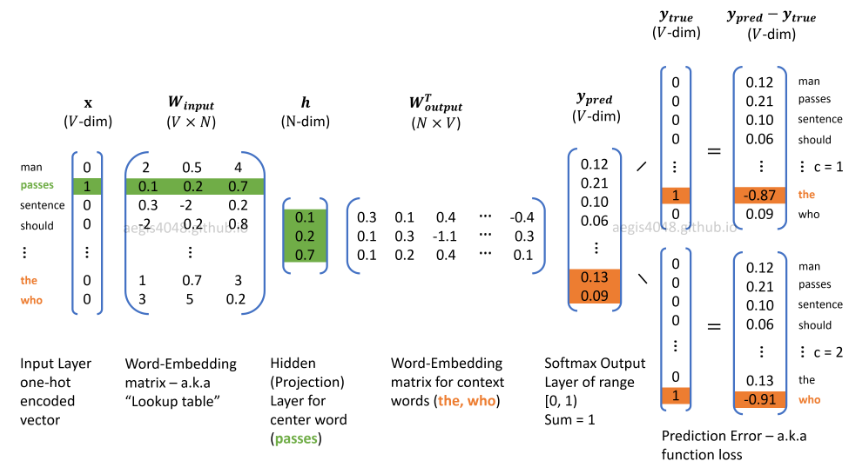

### 3.2 Gensim

[Gensim](https://radimrehurek.com/gensim/index.html) – библиотека обработки естественного языка предназначения для «Тематического моделирования». С его помощью можно обрабатывать тексты, работать с векторными моделями слов (такими как Word2Vec, FastText и т. д.) и создавать тематические модели текстов

In [ ]:
import gensim.downloader as api
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

`word2vec-ruscorpora-300` - word2vec обученный на Russian National Corpus (~ 250M слов), SkipGram с окном 10

В модели "word2vec-ruscorpora-300" после слова указывается часть речи: NOUN (существительное), ADJ (прилагательное) и так далее.

[Расшифровка POS-тегов](https://yandex.ru/dev/mystem/doc/grammemes-values.html/#grammemes-values__parts)

[Другие предобученные эмбеддинги gensim](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)

[Репозиторий gensim-data](https://github.com/RaRe-Technologies/gensim-data)

In [ ]:
wv = api.load('word2vec-ruscorpora-300')

[==================================================] 100.0% 198.8/198.8MB downloaded


In [ ]:
word_vector = wv['человек']
word_vector.shape

KeyError: "Key 'человек' not present"

In [ ]:
word_vector = wv['человек_NOUN']
word_vector.shape

(300,)

In [ ]:
wv.most_similar(positive=['человек_NOUN', 'компьютер_NOUN'], topn=5)

[('компьютерный_ADJ', 0.591947615146637),
 ('программист_NOUN', 0.5713083744049072),
 ('ноутбук_NOUN', 0.5553575158119202),
 ('пользователь_NOUN', 0.5512850880622864),
 ('интернет_NOUN', 0.5506680011749268)]

In [ ]:
wv.most_similar(positive=['королева_NOUN'], negative=['женщина_NOUN'], topn=5)

[('король_NOUN', 0.4940599203109741),
 ('королевский_ADJ', 0.4431174397468567),
 ('саксен::кобург_NOUN', 0.371537983417511),
 ('принц::уэльский_NOUN', 0.36908257007598877),
 ('королевство_NOUN', 0.3571174144744873)]

In [ ]:
print(wv.doesnt_match(['январь_NOUN', 'февраль_NOUN', 'март_NOUN', 'апрель_NOUN', 'собака_NOUN']))

собака_NOUN


### 3.3 Обучение своих SkipGram эмбеддингов с Gensim

[Gensim Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec)

Загрузим данные из Corus и пайплайн обработки из Spacy

In [ ]:
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

--2025-07-24 12:24:10--  https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/87156914/0b363e00-0126-11e9-9e3c-e8c235463bd6?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-24T13%3A17%3A08Z&rscd=attachment%3B+filename%3Dlenta-ru-news.csv.gz&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-24T12%3A16%3A50Z&ske=2025-07-24T13%3A17%3A08Z&sks=b&skv=2018-11-09&sig=OhkGmLdefgo7MAZuEC%2BBJp3fD1Stjj0bMgvMxMZG04A%3D&jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1MzM2MDE1MCwibmJmIjoxNzUzMzU5ODUwLCJwYXRoIjoicmVsZWFzZWFzc2V0

In [ ]:
!python3 -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 84.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import gensim.models
from corus import load_lenta
import spacy
import string

In [ ]:
path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
data = [next(records).text for i in range(10000)]

In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
%%time

res = []

for doc in nlp.pipe(data): # nlp.pipe(data, disable=["tagger", ...]):
    res.append([token.lemma_ for token in doc if token.lemma_ not in string.punctuation and not token.is_stop])
res[0]

CPU times: user 13min 43s, sys: 7.46 s, total: 13min 51s
Wall time: 14min 18s


['вице',
 'премьер',
 'социальный',
 'вопрос',
 'татьяна',
 'голиков',
 'рассказать',
 'какой',
 'регион',
 'россия',
 'зафиксировать',
 'высокий',
 'смертность',
 'рак',
 'сообщать',
 'риа',
 'новость',
 'слово',
 'голиков',
 'онкологический',
 'заболевание',
 'становиться',
 'причина',
 'смерть',
 'псковский',
 'тверской',
 'тульский',
 'орловский',
 'область',
 'севастополь',
 'вице',
 'премьер',
 'напомнить',
 'главный',
 'фактор',
 'смертность',
 'россия',
 '—',
 'рак',
 'болезнь',
 'система',
 'кровообращение',
 'год',
 'известный',
 'смертность',
 'онкологический',
 'заболевание',
 'россиянин',
 'снизиться',
 'впервые',
 'три',
 'год',
 'данным',
 'росстата',
 '2017',
 'год',
 'рак',
 'умереть',
 '289',
 'тысяча',
 'человек',
 '3,5',
 'процент',
 'год']

In [ ]:
%%time

model = gensim.models.Word2Vec(
    sentences=res,
    vector_size=256, # default = 100
    window=7, # default = 5
    min_count=10,
    sg=1, # Training algorithm: 1 for skip-gram; otherwise CBOW
    negative=5, # If > 0, negative sampling will be used, if set to 0, no negative sampling is used.
    epochs=25, # Number of iterations (epochs) over the corpus
    seed=2025,
)

CPU times: user 8min 48s, sys: 1.5 s, total: 8min 49s
Wall time: 5min 6s


In [ ]:
model.wv.most_similar(positive=['апрель'], topn=5)

In [ ]:
model.wv.most_similar(positive=['человек'], topn=5)

[('аметова', 0.42889854311943054),
 ('цунами', 0.41693875193595886),
 ('погибать', 0.3989347219467163),
 ('ребёнок', 0.3989100456237793),
 ('camp', 0.39430832862854004)]

In [ ]:
model.wv.most_similar(positive=['россия'], topn=5)

[('российский', 0.516751766204834),
 ('рф', 0.45961621403694153),
 ('страна', 0.4231090545654297),
 ('москва', 0.41614168882369995),
 ('госграница', 0.3816811442375183)]

### 3.4 Стандартный setup модели

- SkipGram + Negative Sampling
- Negative Samples - 2-5 если много данных, 15-20, если мало
- Размерность вектора 300
- Размер окна - 5-10 (большой размер окна - тематическое сходство, маленький - функциональное сходство)


### 3.5 Проблемы Word2Vec и GloVe

- не учитывается морфология
- проблема с OOV (out of vocabulary) словами, но можно добавить `<unk>`

### 3.6 FastText

- Слова разбиваются на n-grams

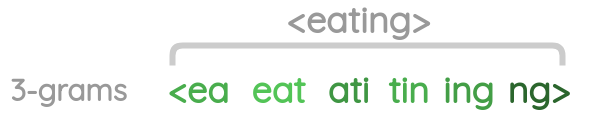

- Вектора для n-gramm обучаются с помощью Skip-gram / CBOW
- Вектор слова - усреднение векторов n-gram

[FastText](https://fasttext.cc/)

**hashing trick**:  n-gram очень много, поэтому зафиксируем максимум векторов, которые хотим обучать, сделаем хэш-таблицу, куда смаппим все n-gram'ы

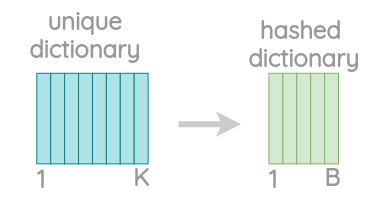

#### Обучим свою FastText-модель

In [ ]:
with open('data.txt', 'w') as f:
  f.writelines(data)

In [ ]:
import fasttext

In [ ]:
%%time

model = fasttext.train_unsupervised('data.txt', wordNgrams=3, dim=300)

CPU times: user 13min 50s, sys: 3.81 s, total: 13min 54s
Wall time: 14min


In [ ]:
model.words[100:110]

In [ ]:
model.get_word_vector("россия")[:15]

In [ ]:
model.get_nearest_neighbors('россия')

### 3.7 Предобученные русскоязычные эмбеддинги

#### RusVectores

[RusVectōrēs](https://rusvectores.org/ru/): семантические модели для русского языка

In [ ]:
import urllib.request
import gensim

In [ ]:
urllib.request.urlretrieve(
    "https://rusvectores.org/static/models/rusvectores4/ruwikiruscorpora/ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz",
    "ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz"
)

In [ ]:
model_path = 'ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz'
model_ru = gensim.models.KeyedVectors.load_word2vec_format(model_path)

In [ ]:
model_ru.most_similar(positive=['ночь_NOUN'], topn=10)

[('ночь_PROPN', 0.7704508304595947),
 ('вечер_NOUN', 0.7683228254318237),
 ('утро_NOUN', 0.7520124316215515),
 ('полночь_NOUN', 0.7201331853866577),
 ('рассвет_NOUN', 0.6792924404144287),
 ('полдень_NOUN', 0.6637035012245178),
 ('утро_PROPN', 0.6531521677970886),
 ('ночь_ADV', 0.6248846650123596),
 ('сумерки_NOUN', 0.6227153539657593),
 ('ночью_NOUN', 0.6219336986541748)]

#### Проблемы

- На практике использовать такие эмбеддинги неудобно. Недостаточно разделить текст на токены, для каждого нужно как-то определить POS-тег.

- Таблица эмбеддингов разбухает. Вместо одного слова «стать», мы храним 6: 2 разумных «стать_VERB», «стать_NOUN» и 4 странных «стать_ADV», «стать_PROPN», «стать_NUM», «стать_ADJ».

- В таблице на 250 000 записей 195 000 уникальных слов.

#### Navec

[navec](https://natasha.github.io/navec/) - компактные эмбеддинги для русского языка

GloVe эмбеддинги, в текстах мало опечаток, проблему OOV-токенов решает большой словарь. 250 000 строк в таблице news_1B_250K_300d_100q покрывают 98% слов в новостных статьях.

Архивы мало весят из-за квантизации: заменили 32-битные float-числа на 8-битные коды, затем заменили int-кодом не одно, а 3 числа. Кластеризуем все тройки чисел из таблицы эмбеддингов алгоритмом k-means на 256 кластеров, вместо каждой тройки будем хранить код от 0 до 255. - [Product Quantizers for k-NN](https://mccormickml.com/2017/10/13/product-quantizer-tutorial-part-1/)

При использовании сжатые вектора распаковываются.

[Более подробно про Navec](https://natasha.github.io/navec/)


[Navec evaluation](https://github.com/natasha/navec#evaluation)

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar

In [ ]:
from navec import Navec

In [ ]:
path = 'navec_news_v1_1B_250K_300d_100q.tar'
navec = Navec.load(path)
navec['человек'][:15]

array([-0.13068067, -0.12051002, -0.05782367,  0.07967507,  0.08338855,
        0.59920526,  0.4020081 , -1.0838276 ,  0.12556174,  0.17060532,
        0.16637331, -0.00257014,  0.51296437,  0.17175263, -0.40394753],
      dtype=float32)

### 3.8 Визуализация

https://projector.tensorflow.org/

### 3.9 Оценка эмбеддингов

#### Extrinsic

На downstream задачах

#### Intrinsic

#### SimLex-999

[SimLex-999](https://fh295.github.io/simlex.html)

Обеспечивает способ измерения того, насколько хорошо модели отражают сходство, а не родство или ассоциацию.

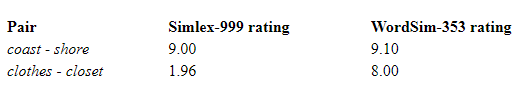

(coast\shore - берег, closet - шкаф, clothes - одежда)

#### wordsim353

[wordsim353](http://alfonseca.org/eng/research/wordsim353.html)

Оценивает сходство/связность слов